In [1082]:
import cv2

import sklearn

In [1083]:
import sys
sys.executable

'C:\\Users\\Chernger\\Anaconda3\\envs\\tensorflow-gpu\\python.exe'

In [1084]:
import cv2
import glob

img_list = []

for img in glob.glob("CCD-1/*.jpg"):
    img_list.append(cv2.imread(img,0))

In [1085]:
img_list

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [1248]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#replace========================
filename = './CCD-1/new (164).jpg'
print(filename)
img_list[8] = np.array(cv2.imread(filename,0))
print(img_list[8])
#========================
                       
gray = img_list[8]

ret, thresh1 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
print(gray)

#print(thresh1)


contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)

for i in range(np.array(contours).shape[0]):
    if(np.array(contours[i]).shape[0]>1500):
        cv2.drawContours(backtorgb,contours[i],-1,(0,0,255),3)
        print(i)


#cv2.imshow("img", gray)
#cv2.waitKey(0)


for i in range(np.array(contours).shape[0]):
        if(np.array(contours[i]).shape[0]>1500):
            print(np.array(contours[i]).shape)


./CCD-1/new (164).jpg
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
1
42
(2242, 1, 2)
(2050, 1, 2)


(2242, 2)
1116.1563233526235 1088.5973628483998 761.4379608728648
(2050, 2)
1118.217606161127 1089.496620745032 646.0297680252838


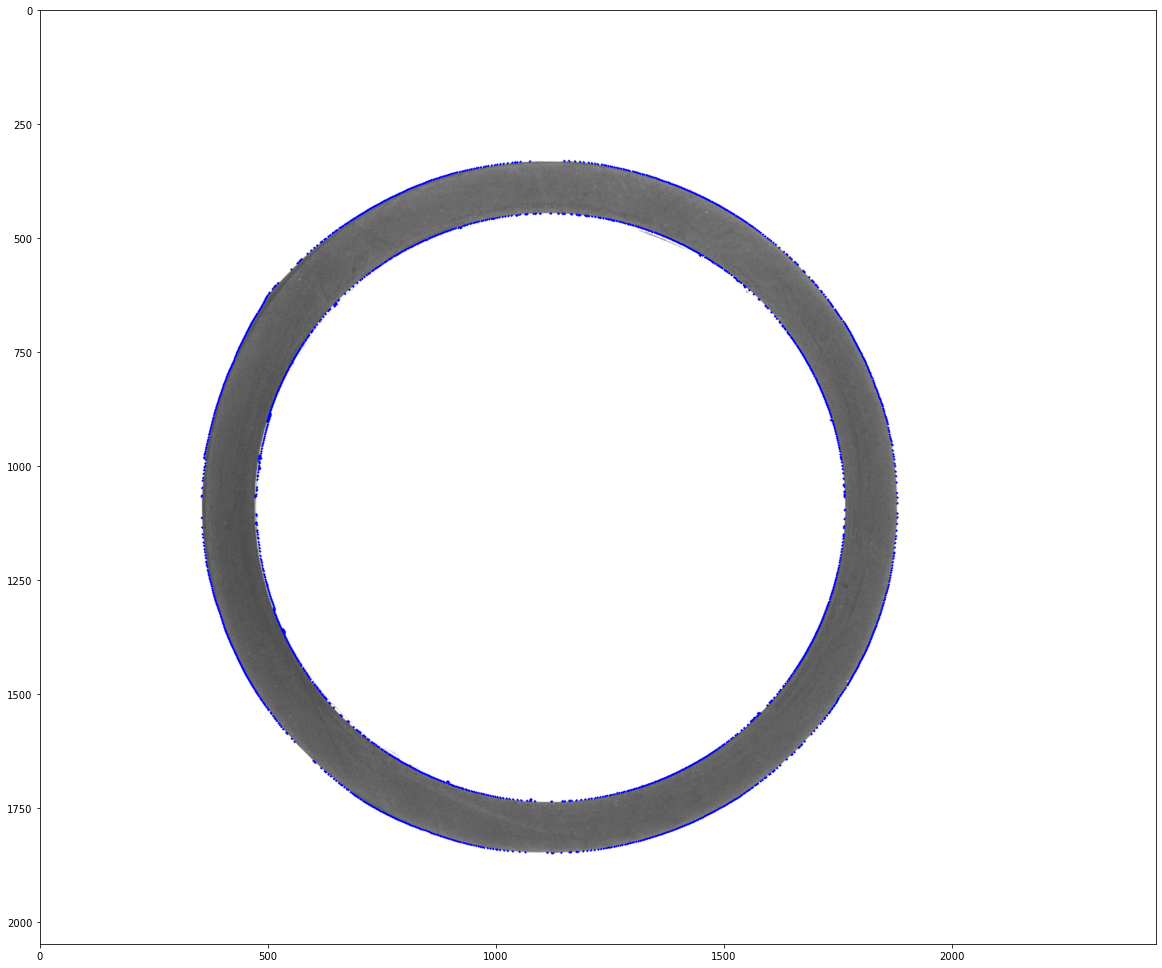

In [1249]:
import circle_fit as cf

circle_point = []

for i in range(np.array(contours).shape[0]):
        if(np.array(contours[i]).shape[0]>1500):
            #print(np.array(contours[i]).shape)

            cor = np.array(contours[i])
            cor = cor.reshape(cor.shape[0],cor.shape[2])
            print(cor.shape)

            xc,yc,r,_ = cf.least_squares_circle(cor)
            print(xc,yc,r)
            circle_point.append([xc,yc,r])

            #===========
            #cv2.circle(backtorgb,(1115, 1081), 640, (255, 0, 0), -1)
            #cv2.circle(backtorgb,(xc.astype(int), yc.astype(int)), r.astype(int), (255, 0, 0), 2)
            #=============

plt.figure(figsize=(20,20))
plt.imshow(backtorgb)

In [1250]:
circle_point

[[1116.1563233526235, 1088.5973628483998, 761.4379608728648],
 [1118.217606161127, 1089.496620745032, 646.0297680252838]]

(2242, 2)
1116.1563233526235 1088.5973628483998 761.4379608728648


True

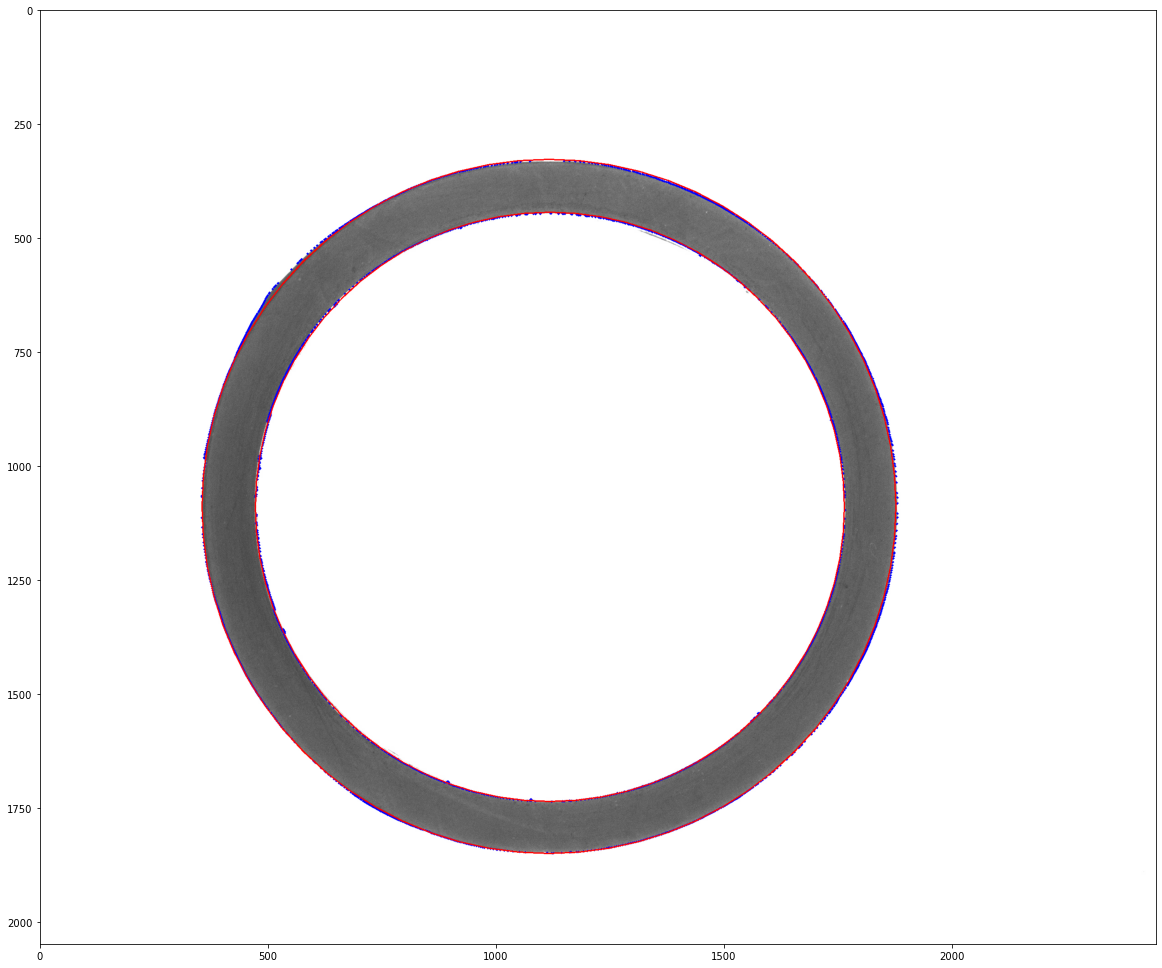

In [1251]:
    

cor = np.array(contours[1])
cor = cor.reshape(cor.shape[0],cor.shape[2])
print(cor.shape)

xc,yc,r,_ = cf.least_squares_circle(cor)
print(xc,yc,r)

#===========
#cv2.circle(backtorgb,(1115, 1081), 640, (255, 0, 0), -1)
for i in range(len(circle_point)):
    cv2.circle(backtorgb,(circle_point[i][0].astype(int), circle_point[i][1].astype(int)), circle_point[i][2].astype(int), (255, 0, 0), 2)
    
#=============

plt.figure(figsize=(20,20))
plt.imshow(backtorgb)
cv2.imwrite('contour.jpg',backtorgb)

### Local gray 

1116.1563233526235   1088.5973628483998


True

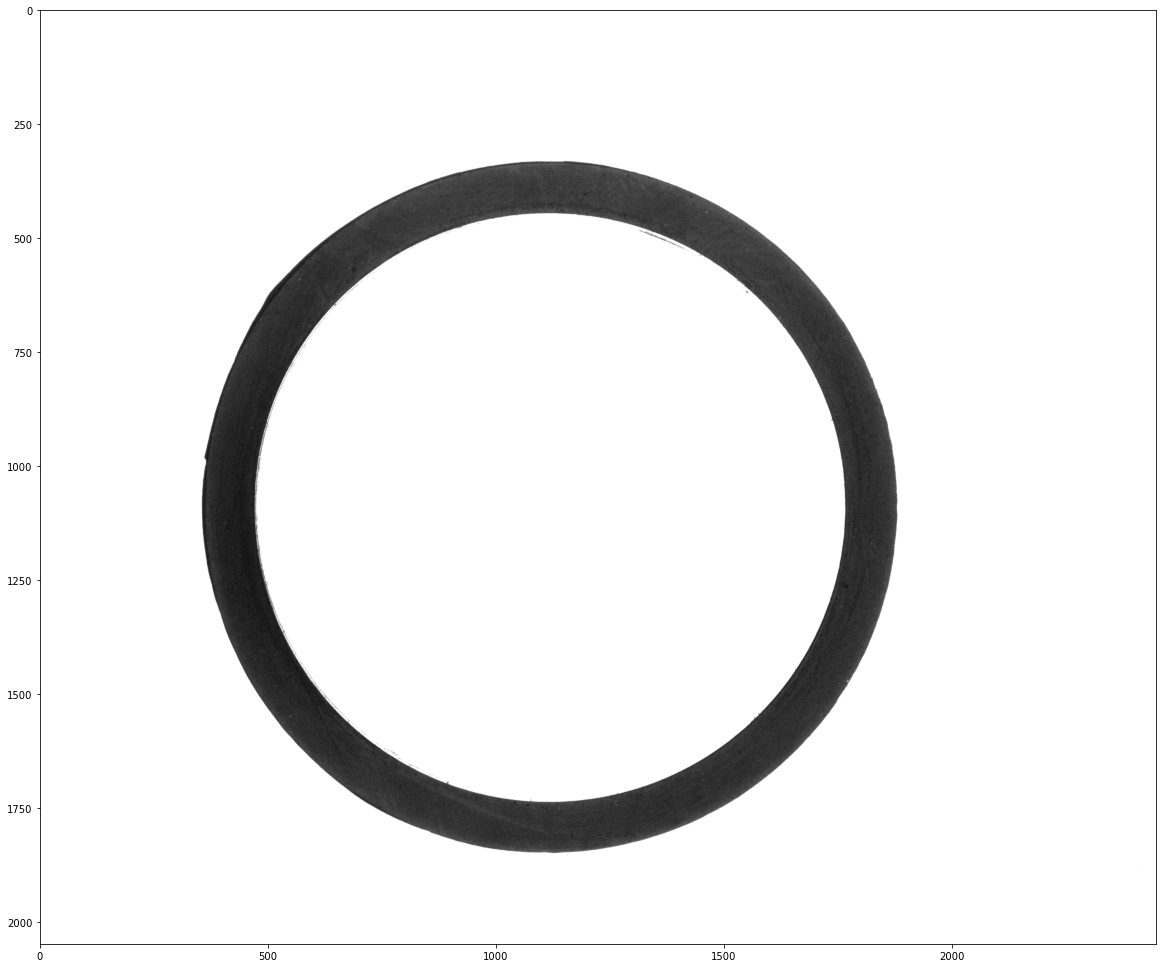

In [1252]:
#print(cv2.cvtColor(img_list[8],cv2.COLOR_GRAY2RGB).shape)
plt.figure(figsize=(20,20))
plt.imshow(img_list[8],cmap = 'gray')


print(xc," ",yc)
cv2.imwrite('orginal.jpg',img_list[8])

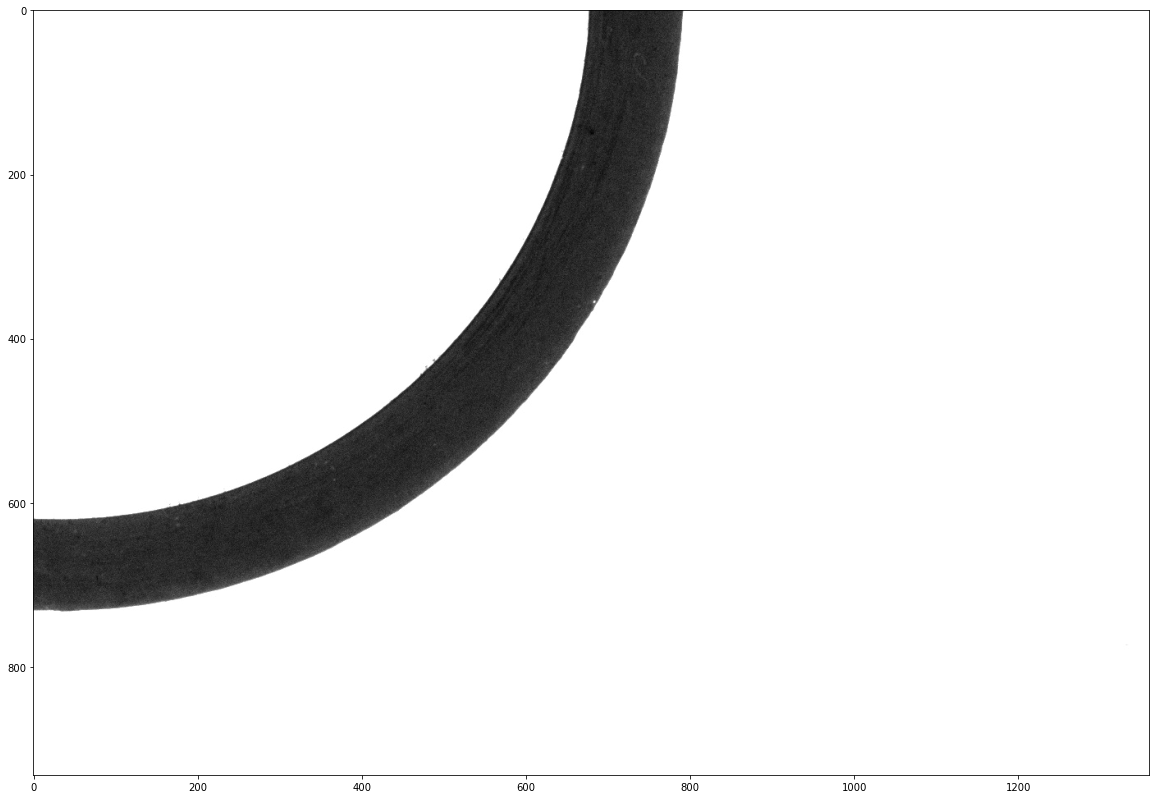

In [1253]:
img_temp = img_list[8][int(xc):,int(yc):]
img_temp.shape
plt.figure(figsize=(20,20))
plt.imshow(img_temp,cmap = 'gray')
#cv2.imwrite('1.jpg',img_temp)

In [1254]:
g1 = cv2.GaussianBlur(img_temp,(3, 3), 0, 0);
g2 = cv2.GaussianBlur(g1,(3, 3), 0, 0);
dog = np.subtract(g1, g2);
cv2.normalize(dog, dog, 255, 0, cv2.NORM_MINMAX);

True

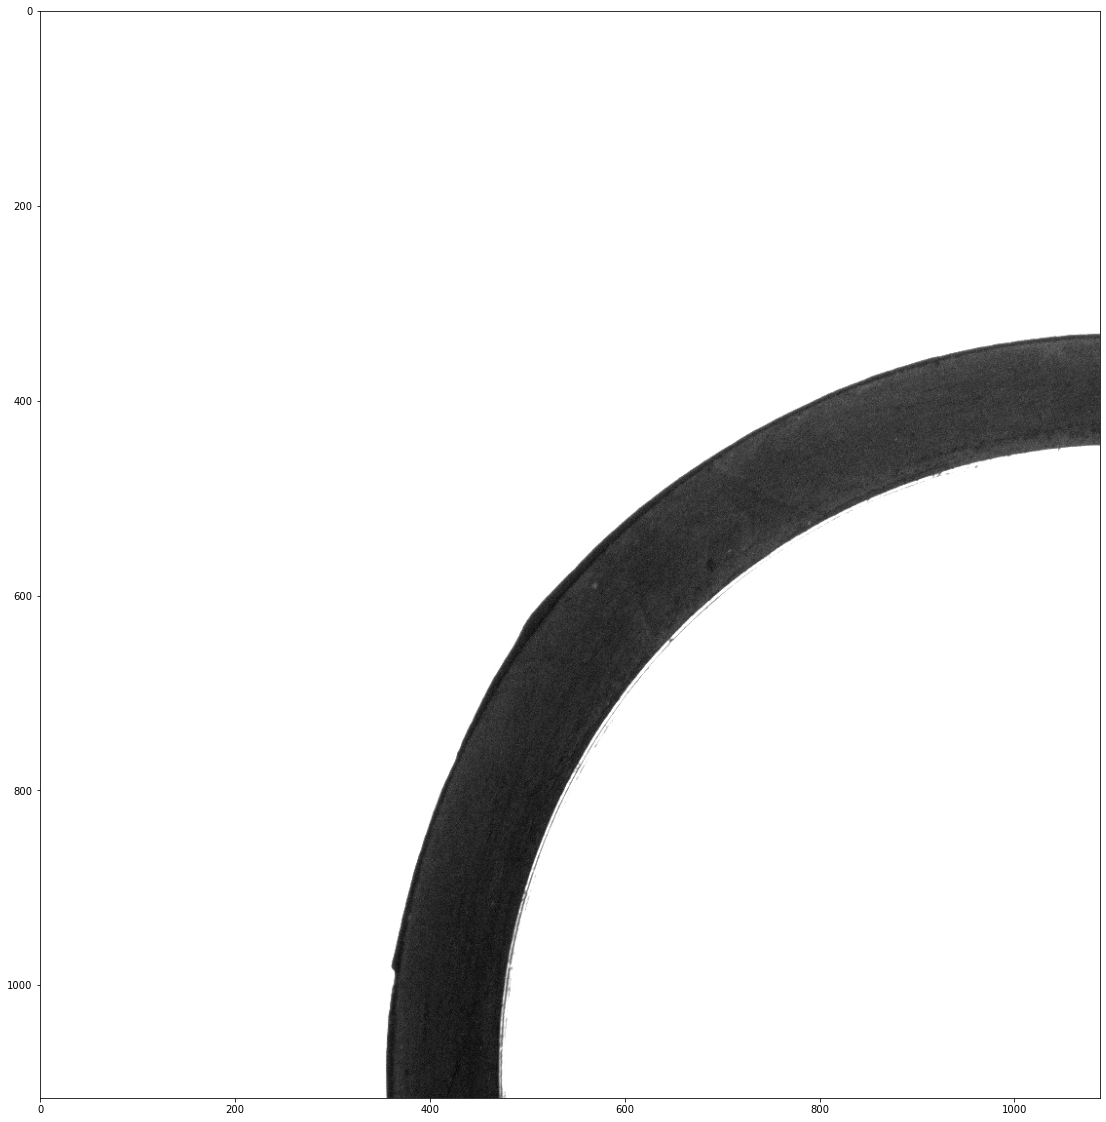

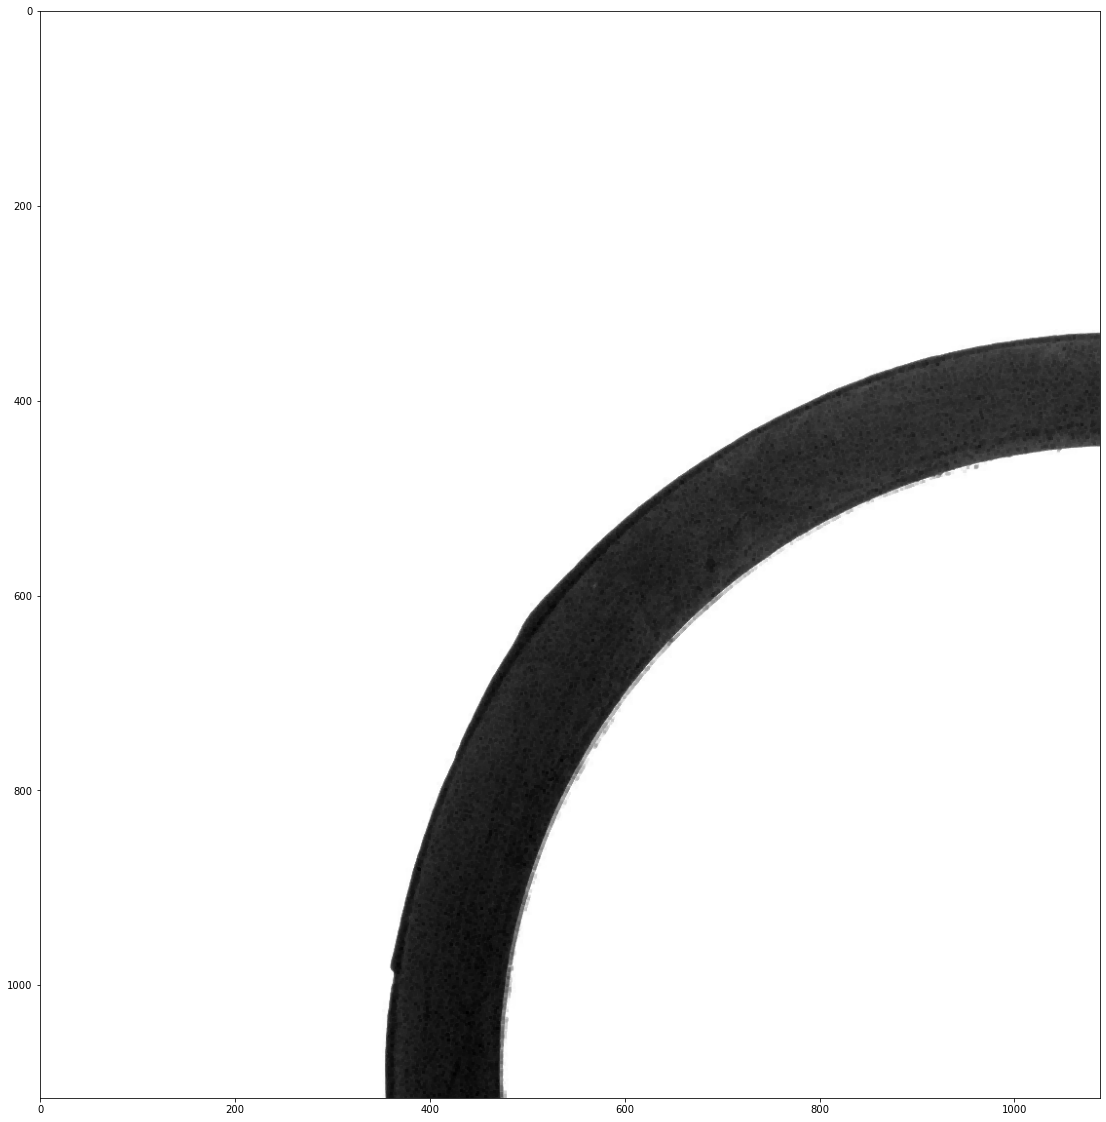

In [1263]:
from scipy import ndimage, misc
img_temp = img_list[8][:int(xc),:int(yc)]
img_temp.shape
plt.figure(figsize=(20,20))
plt.imshow(img_temp,cmap = 'gray')
cv2.imwrite('5.jpg',img_temp)


#==========================================
#ascent = misc.ascent()

#result = cv2.GaussianBlur(img_temp,(3, 3), 0, 0);
#result = cv2.GaussianBlur(result,(3, 3), 0, 0);
result = ndimage.minimum_filter(img_temp, size=3)
msk = (img_temp == result)

#result = cv2.Canny(result,60,60)
plt.figure(figsize=(20,20))
plt.imshow(result,cmap = 'gray')
#plt.imshow(img_temp,cmap = 'gray')
cv2.imwrite('5_after.jpg',result)

### connected component

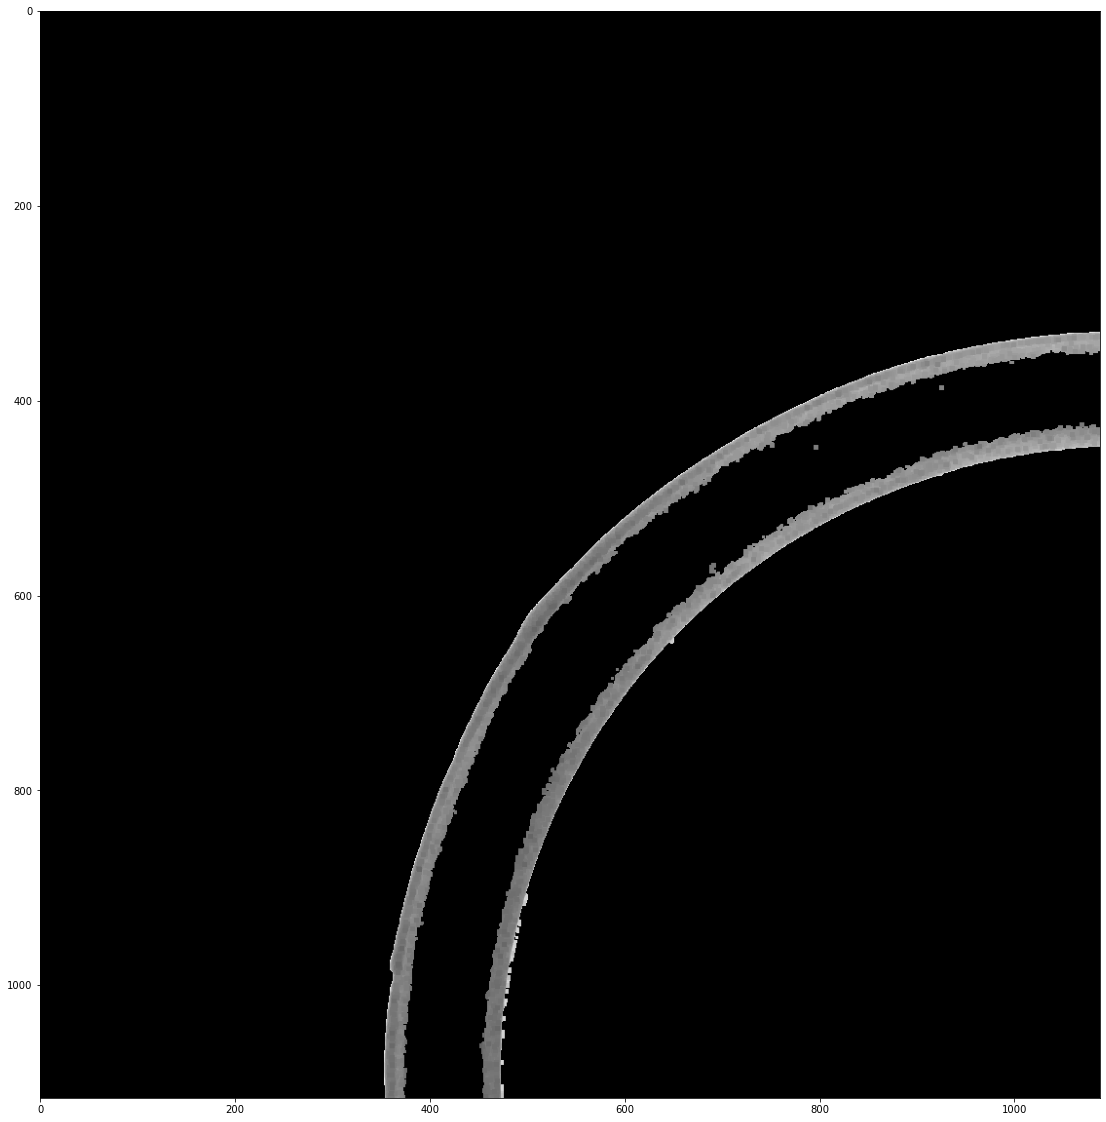

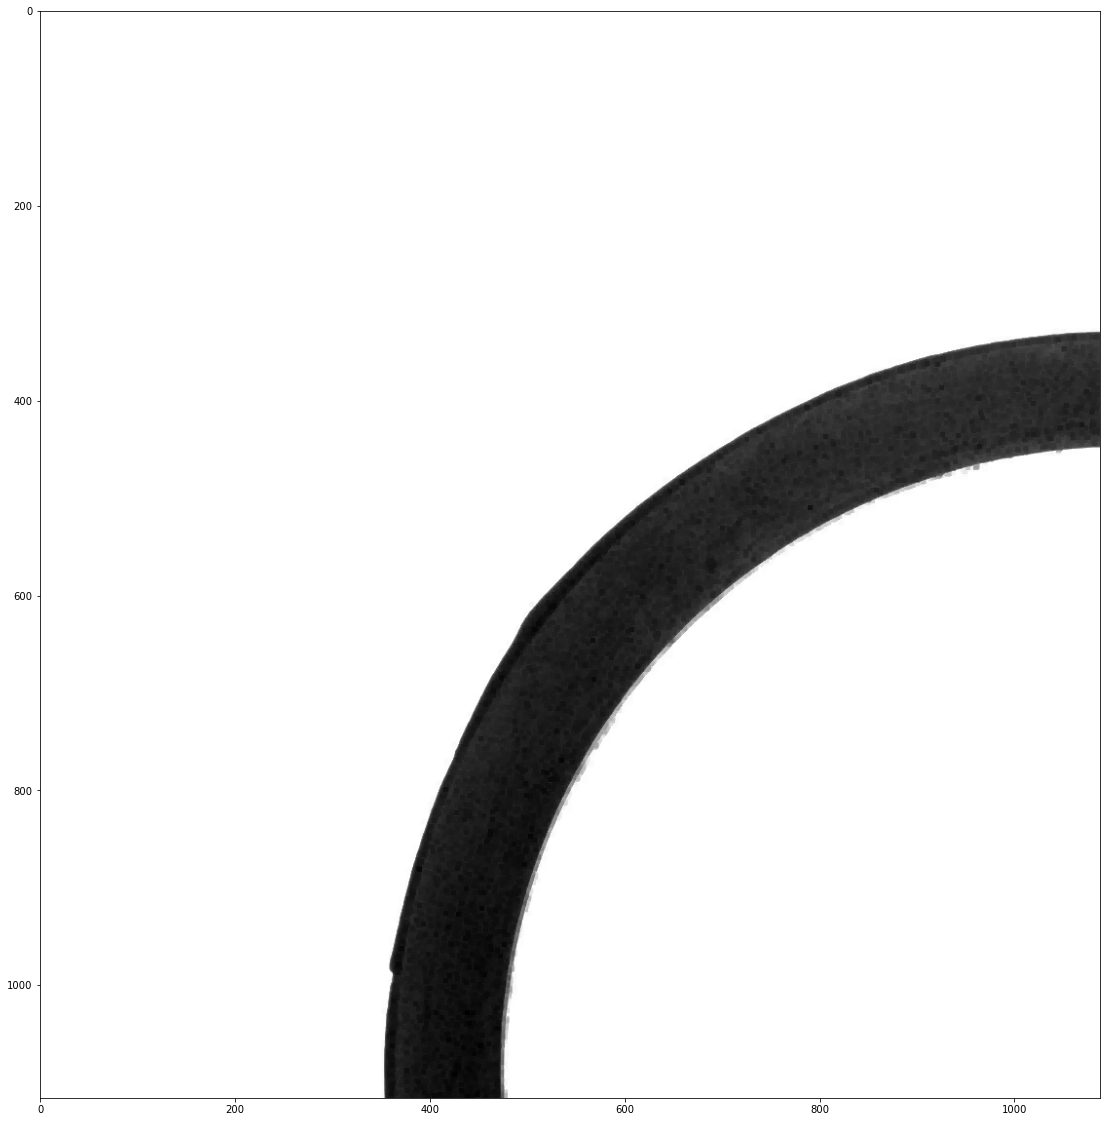

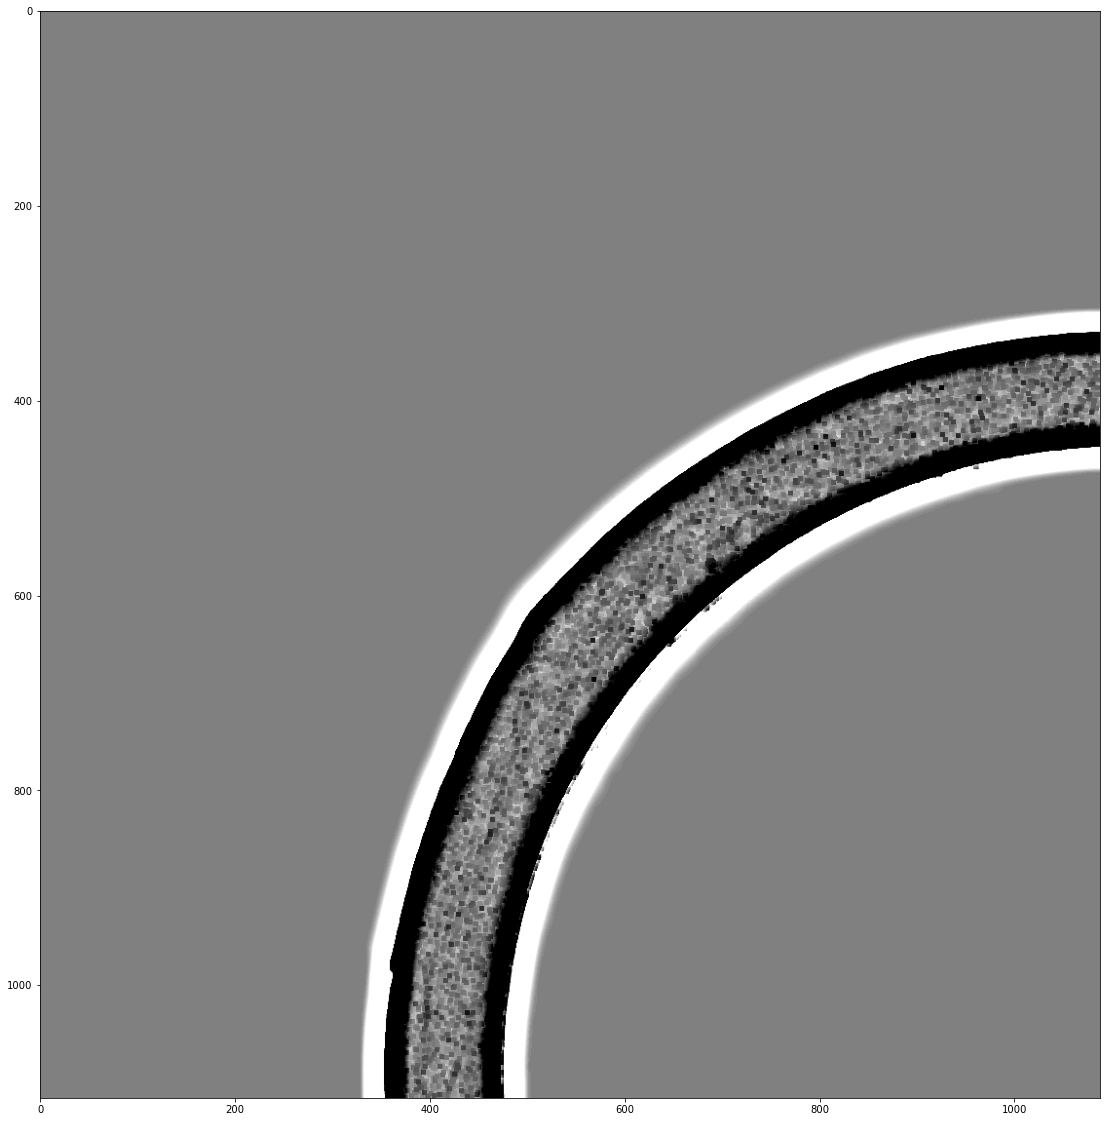

In [1265]:
from scipy import ndimage, misc



img_temp = img_list[8][:int(xc),:int(yc)]
img_temp.shape

#==========================================
#ascent = misc.ascent()

#result = cv2.GaussianBlur(img_temp,(3, 3), 0, 0);
#result = cv2.GaussianBlur(result,(3, 3), 0, 0);
img_temp = ndimage.minimum_filter(img_temp, size=5)
#result = cv2.Canny(result,60,60)

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

#sharpen_img = cv2.filter2D(img_temp, -1, kernel)
#sharpen_img = cv2.filter2D(sharpen_img, -1, kernel)
#sharpen_img = cv2.addWeighted(img_temp, 10, cv2.blur(img_temp, (30,30)), -10, 128)
sharpen_img = cv2.addWeighted(img_temp, 10, cv2.blur(img_temp, (50,50)), -10, 128)
ret,thresh1 = cv2.threshold(sharpen_img,0,1,cv2.THRESH_BINARY_INV)#THRESH_TOZERO_INV

kernel = np.ones((3,3),np.uint8)
mask = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)

#mask====================================
'''
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if(mask[i][j]!=0):
            print(mask[i][j])
'''        
img_temp_mask = img_temp* mask
plt.figure(figsize=(20,20))
plt.imshow(img_temp_mask,cmap = 'gray')
#cv2.imwrite('temp.jpg',sharpen_img)
plt.figure(figsize=(20,20))
plt.imshow(img_temp,cmap = 'gray')

plt.figure(figsize=(20,20))
plt.imshow(sharpen_img,cmap = 'gray')

(1116, 1088)


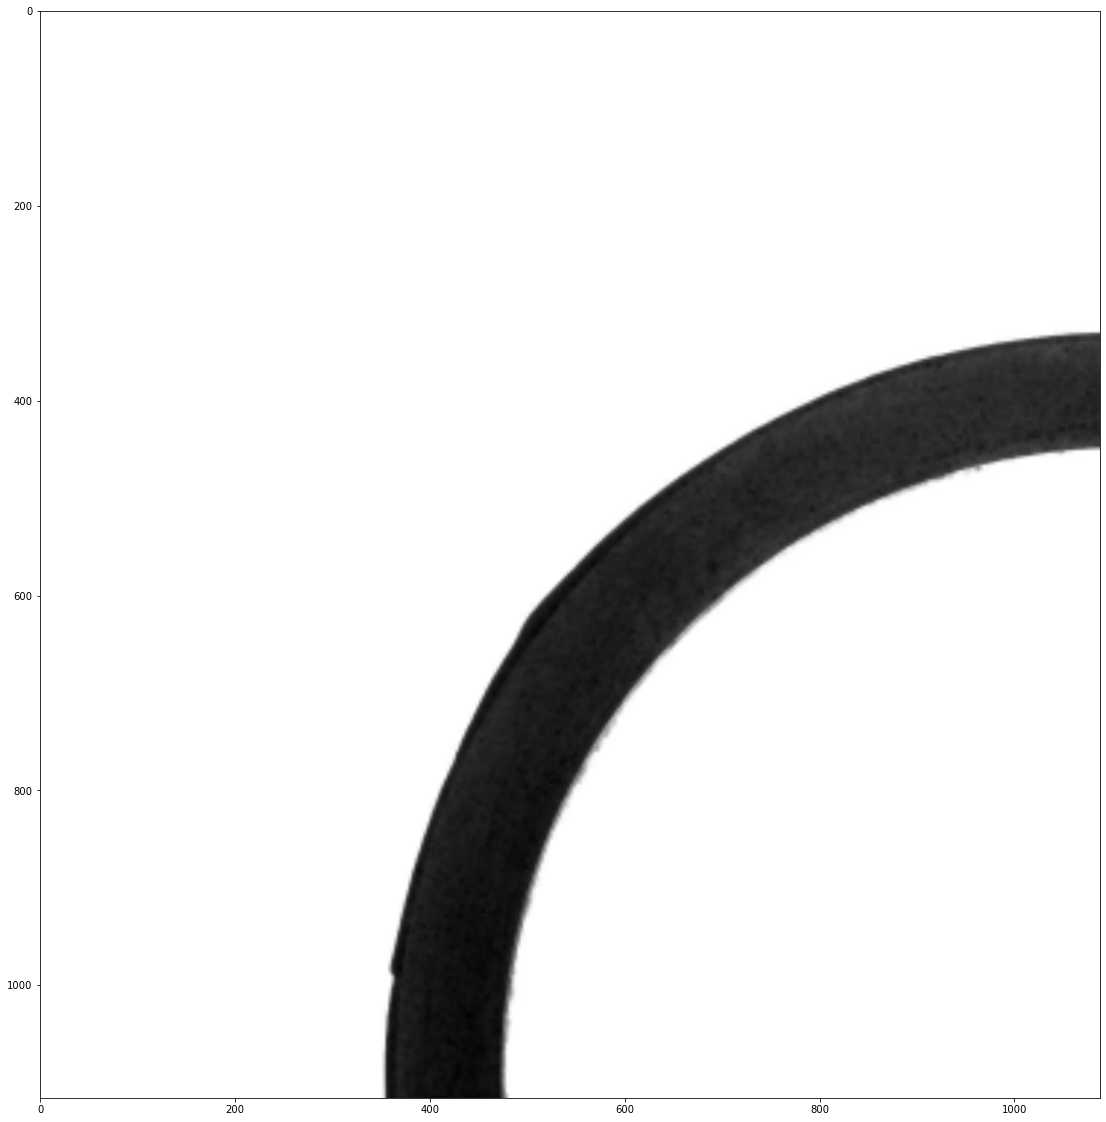

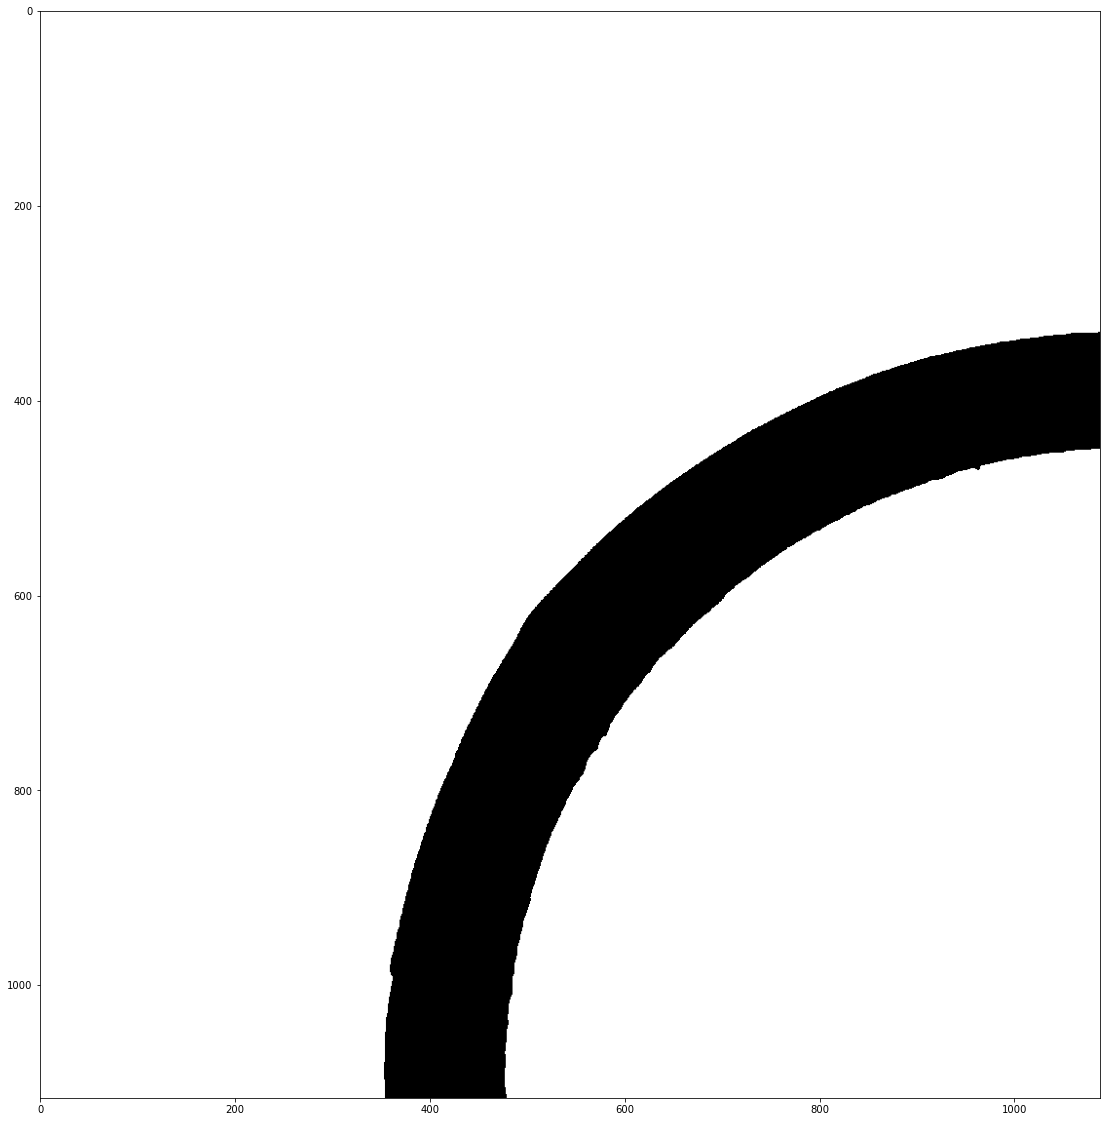

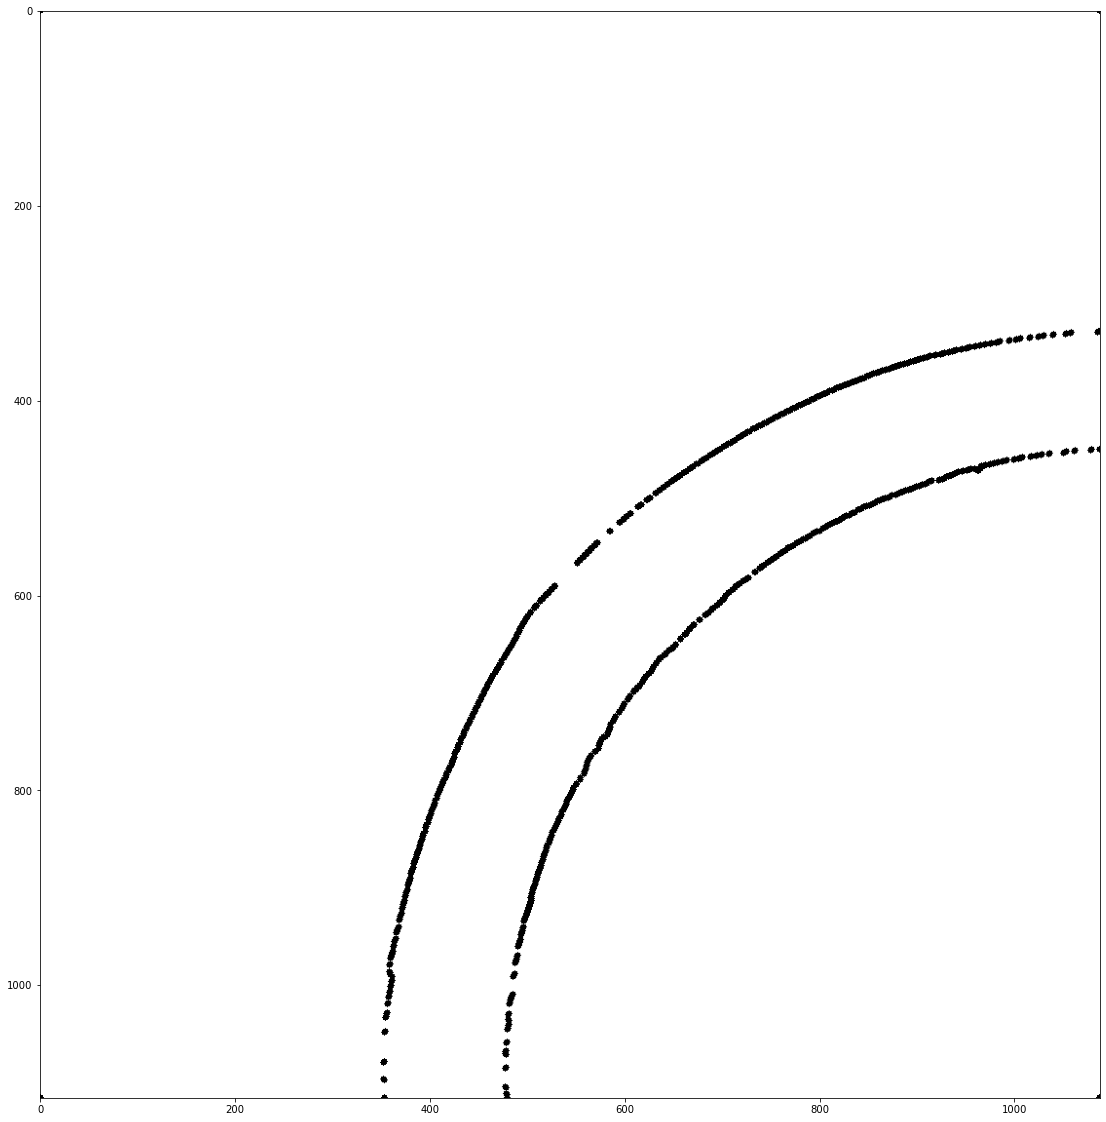

In [1266]:
#img_temp = sharpen_img

block_size = (3,3)
block_img = []
block_std = []

original_shape = img_temp.shape
print(original_shape)
for w in range(block_size[0],img_temp.shape[0],block_size[0]):
    temp = []
    #temp_std = []
    for h in range(block_size[1],img_temp.shape[1],block_size[1]):
        #print(np.array(img_temp[w-block_size[0]:w,h-block_size[1]:h]).shape)
        temp.append(np.mean(img_temp[w-block_size[0]:w,h-block_size[1]:h]))
        #temp_std.append(np.std(img_temp[w-block_size[0]:w,h-block_size[1]:h]))
        
    #block_std.append(temp_std)
    block_img.append(temp)
    
block_img = np.array(block_img,np.uint8)


block_img = cv2.resize(block_img,(original_shape[1],original_shape[0]))
block_img.shape
plt.figure(figsize=(20,20))
plt.imshow(block_img,cmap = 'gray')


#find contour
'''
sharpen_block_img = cv2.addWeighted(block_img, 3, cv2.blur(block_img, (15,15)), -3, 45)
ret,thresh1 = cv2.threshold(sharpen_block_img,0,1,cv2.THRESH_BINARY_INV)#THRESH_TOZERO_INV
'''

ret, thresh1 = cv2.threshold(block_img, 200, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20,20))
plt.imshow(thresh1,cmap = 'gray')
contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_LIST  ,cv2.CHAIN_APPROX_SIMPLE)

black_img = np.array( [[255] * block_img.shape[1] for i in range (block_img.shape[0])])
#backtorgb = cv2.cvtColor(block_img,cv2.COLOR_GRAY2RGB)

for i in range(np.array(contours).shape[0]):
    #if(np.array(contours[i]).shape[0]>1500):
        cv2.drawContours(black_img,contours[i],-1,(0,0,0),6)
        #print(i)
        
plt.figure(figsize=(20,20))
plt.imshow(black_img,cmap = 'gray')


In [1267]:
#block_img = np.array(block_img)

sharpen_img = cv2.addWeighted(block_img, 10, cv2.blur(block_img, (30,30)), -10, 128)
ret,thresh1 = cv2.threshold(sharpen_img,0,1,cv2.THRESH_BINARY_INV)#THRESH_TOZERO_INV

kernel = np.ones((3,3),np.uint8)
mask = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)

(1116, 1088)
617.0008103722394
774.7257579298625
Area:  7178 ; X_Width:  326 ; Y_Width:  646 ; Bounding_Box_Area:  210596
29.339091668988576
nan
Mean:  86.80149314450956  std: 16.848844555204714
Area:  4099 ; X_Width:  167 ; Y_Width:  463 ; Bounding_Box_Area:  77321
18.863381312515248
nan
Mean:  85.48211294673554  std: 18.393636065026882


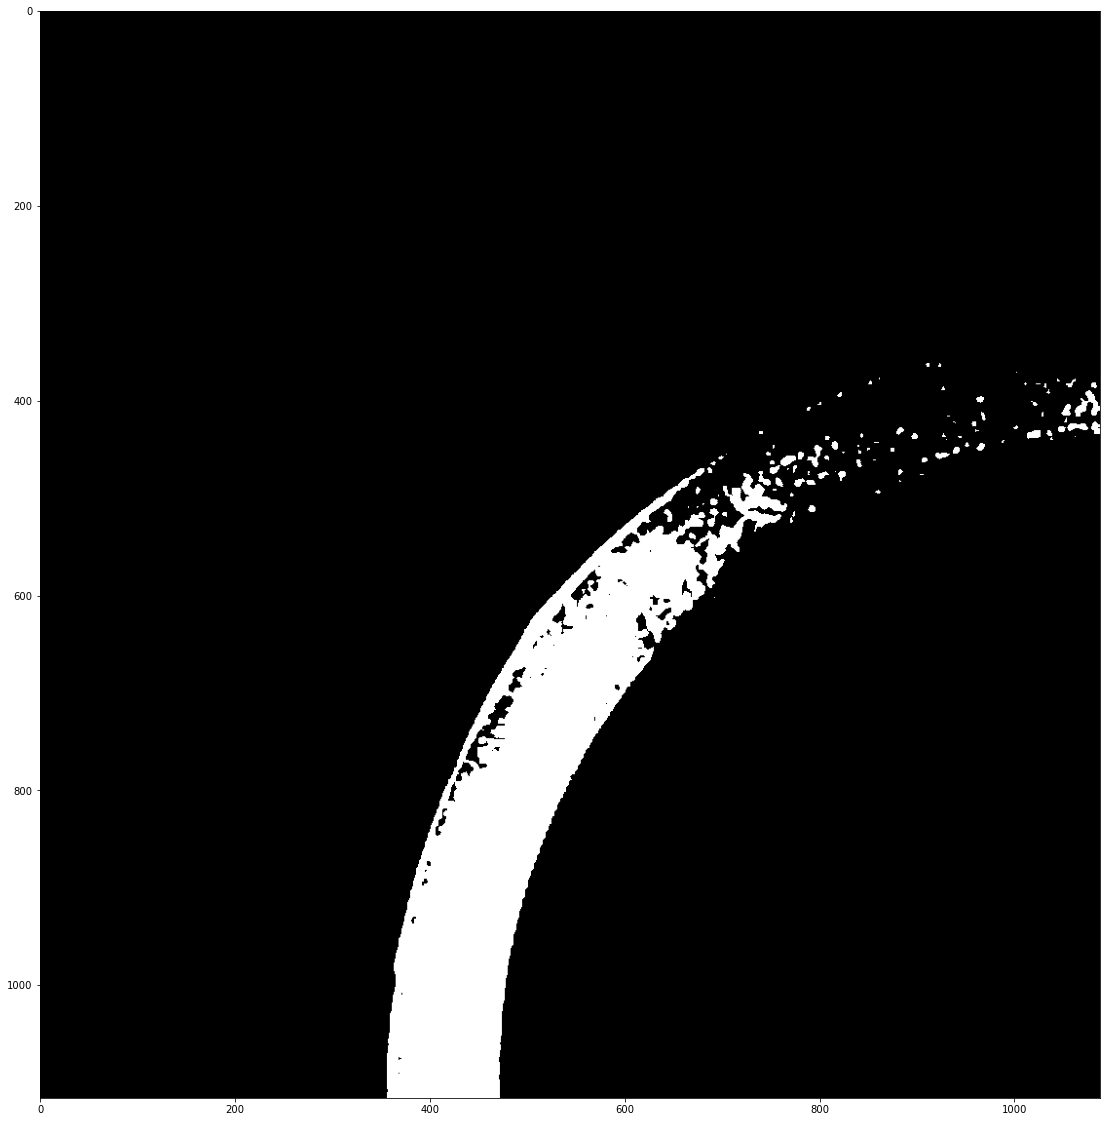

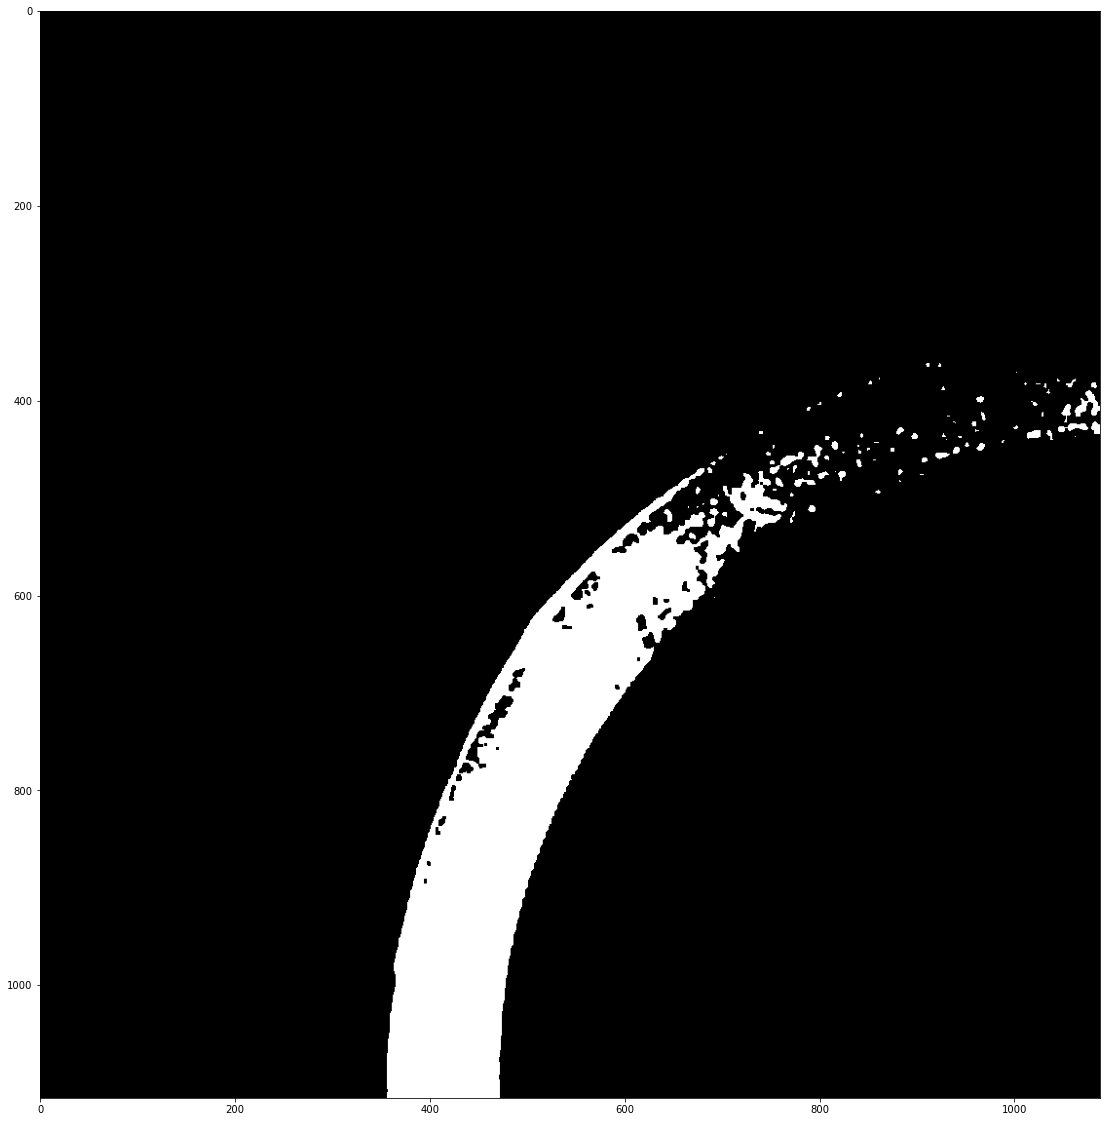

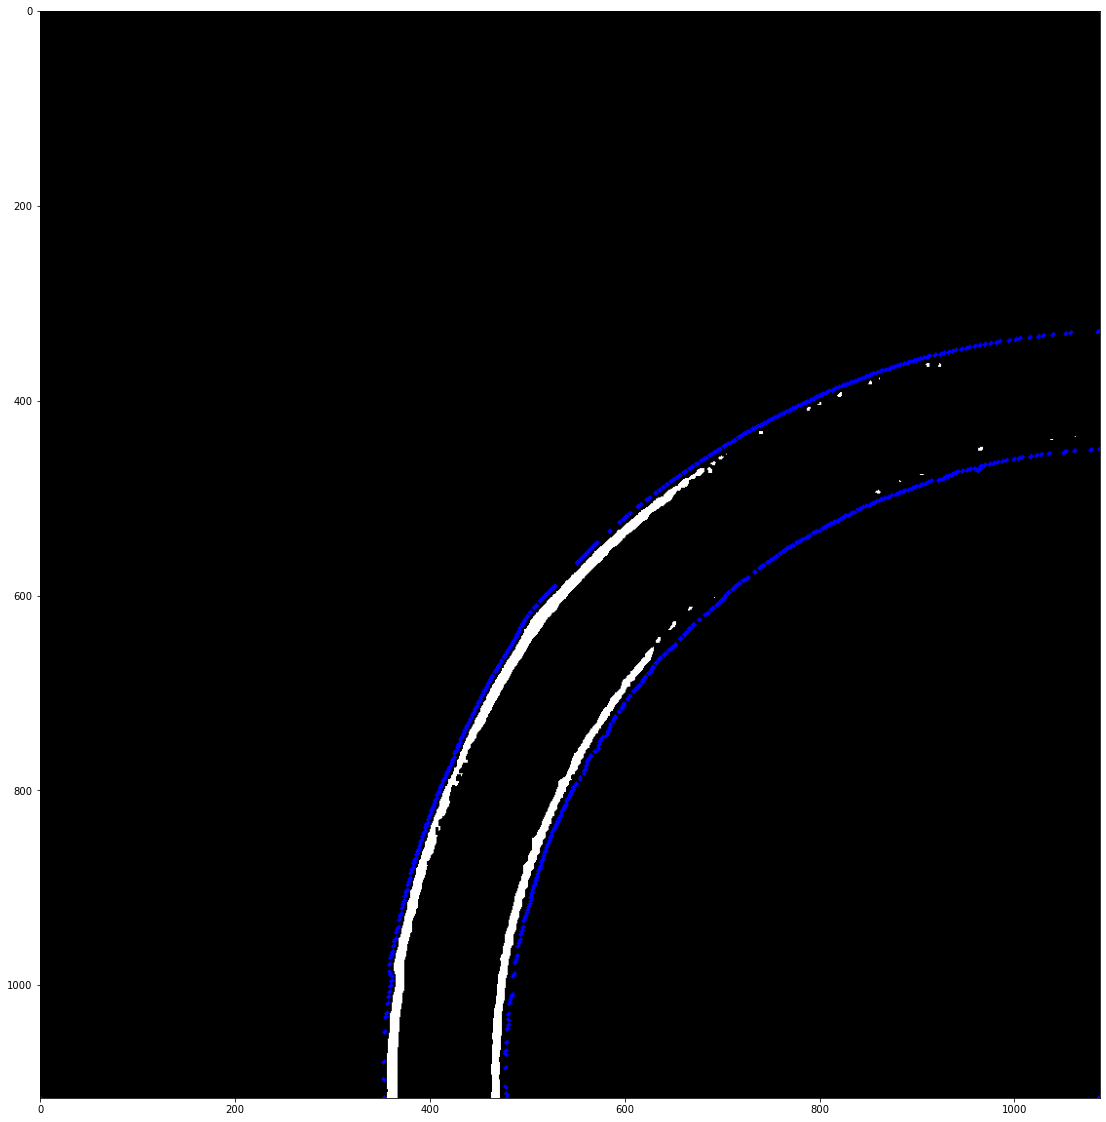

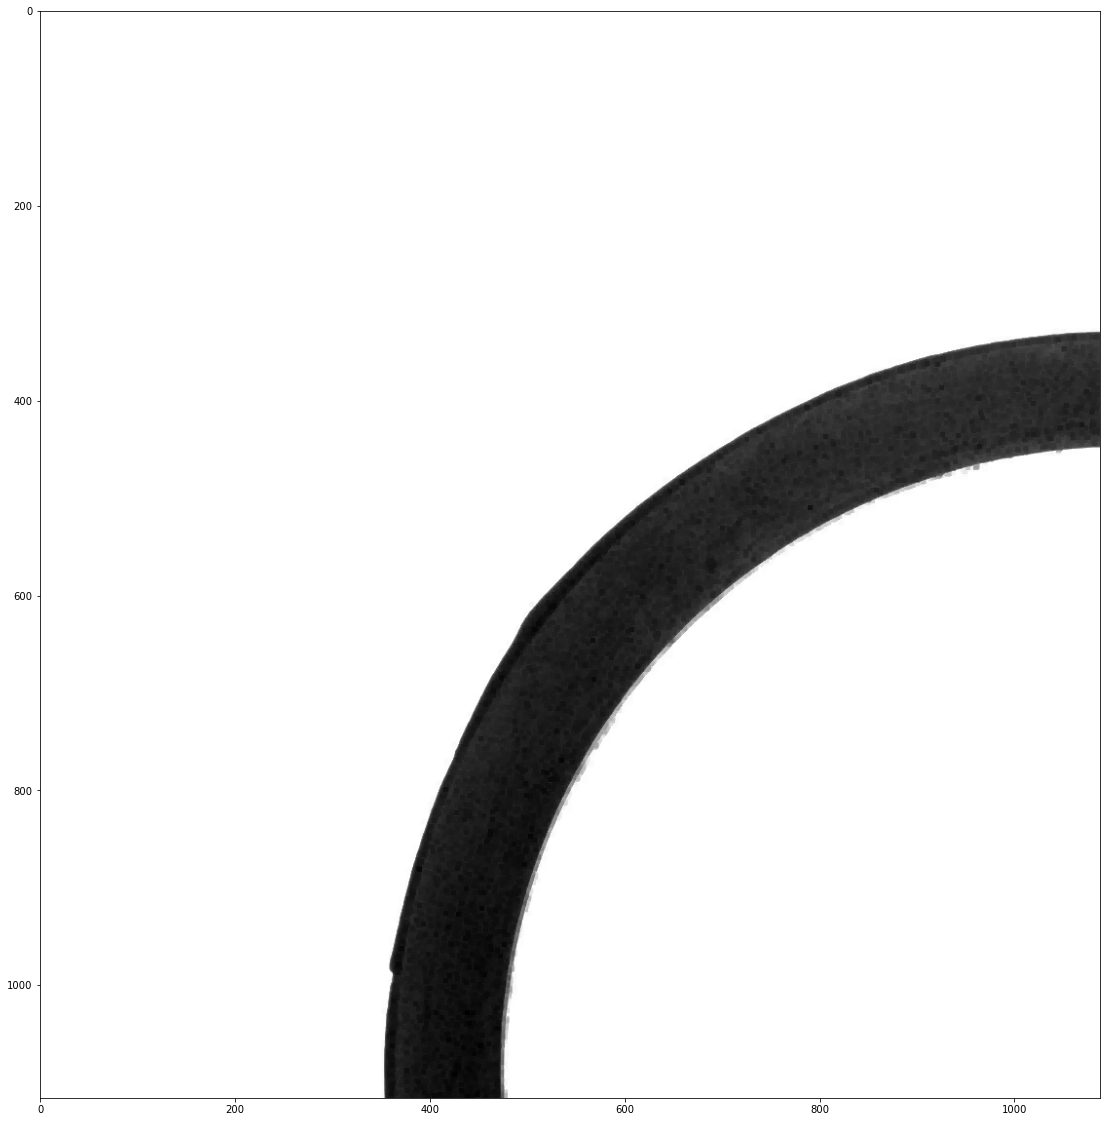

In [1280]:
#block_img = np.array(img_temp)
#block_img = np.array(block_img)
#rint(block_img)


#threshold
ret,thresh1 = cv2.threshold(block_img,90,255,cv2.THRESH_BINARY_INV)#THRESH_TOZERO_INV
#thresh1 = cv2.adaptiveThreshold(block_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,2)

plt.figure(figsize=(20,20))
plt.imshow(thresh1,cmap = 'gray')

kernel = np.ones((3,3),np.uint8)

#opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)


plt.figure(figsize=(20,20))
plt.imshow(closing,cmap = 'gray')


closing = closing * mask


closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)

# 消除外圍edge
#closing = black_img * closing
#plt.figure(figsize=(20,20))
#plt.imshow(closing,cmap = 'gray')
label = []
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(closing)

#==========================================================
backtorgb = cv2.cvtColor(closing,cv2.COLOR_GRAY2RGB)

for i in range(np.array(contours).shape[0]):
    #if(np.array(contours[i]).shape[0]>1500):
        cv2.drawContours(backtorgb,contours[i],-1,(0,0,255),3)

        
plt.figure(figsize=(20,20))
plt.imshow(backtorgb)     

#==========================================================


#===========分開邊界和真正的瑕疵=============================


print(closing.shape)
    
white_x , white_y = np.where(closing != 0)

white_radius = ((white_x-closing.shape[0])**2+(white_y-closing.shape[1])**2)**0.5

print(np.min(white_radius))
print(np.max(white_radius))

#==========================================================


closing_backtorgb = cv2.cvtColor(closing,cv2.COLOR_GRAY2RGB)

for i in range(len(stats)):
    area = stats[i][4]
    if(area < 10000 and area > 350):
        Bounding_Box_Area = stats[i][2]*stats[i][3]
        X_Width,Y_Width = stats[i][2],stats[i][3]
        print("Area: ",area,"; X_Width: ",X_Width,"; Y_Width: ",Y_Width,"; Bounding_Box_Area: ",Bounding_Box_Area)
        print(Bounding_Box_Area/area)
        cv2.rectangle(closing_backtorgb, (stats[i][0], stats[i][1]), (stats[i][0]+stats[i][2], stats[i][1]+stats[i][3]), (0, 255,255 ), 1)
        print(np.mean(img_temp[stats[i][0]:stats[i][0]+stats[i][2]][stats[i][1]:stats[i][1]+stats[i][3]]))
        if(Bounding_Box_Area/area<100): # stage2: 消除邊界
            
            Array = img_temp[stats[i][1]-50:stats[i][1]+stats[i][3]+50,stats[i][0]-50:stats[i][0]+stats[i][2]+50]        
            Mean = Array[Array<200].mean()
            std = Array[Array<200].std()
            print("Mean: ", Mean, " std:",std)
            #print(Array[Array<Mean-2.3*std].shape[0]/Array.shape[0])
            cv2.rectangle(closing_backtorgb, (stats[i][0], stats[i][1]), (stats[i][0]+stats[i][2], stats[i][1]+stats[i][3]), ( 255,0,0 ), 1)

plt.figure(figsize=(20,20))
plt.imshow(closing_backtorgb)


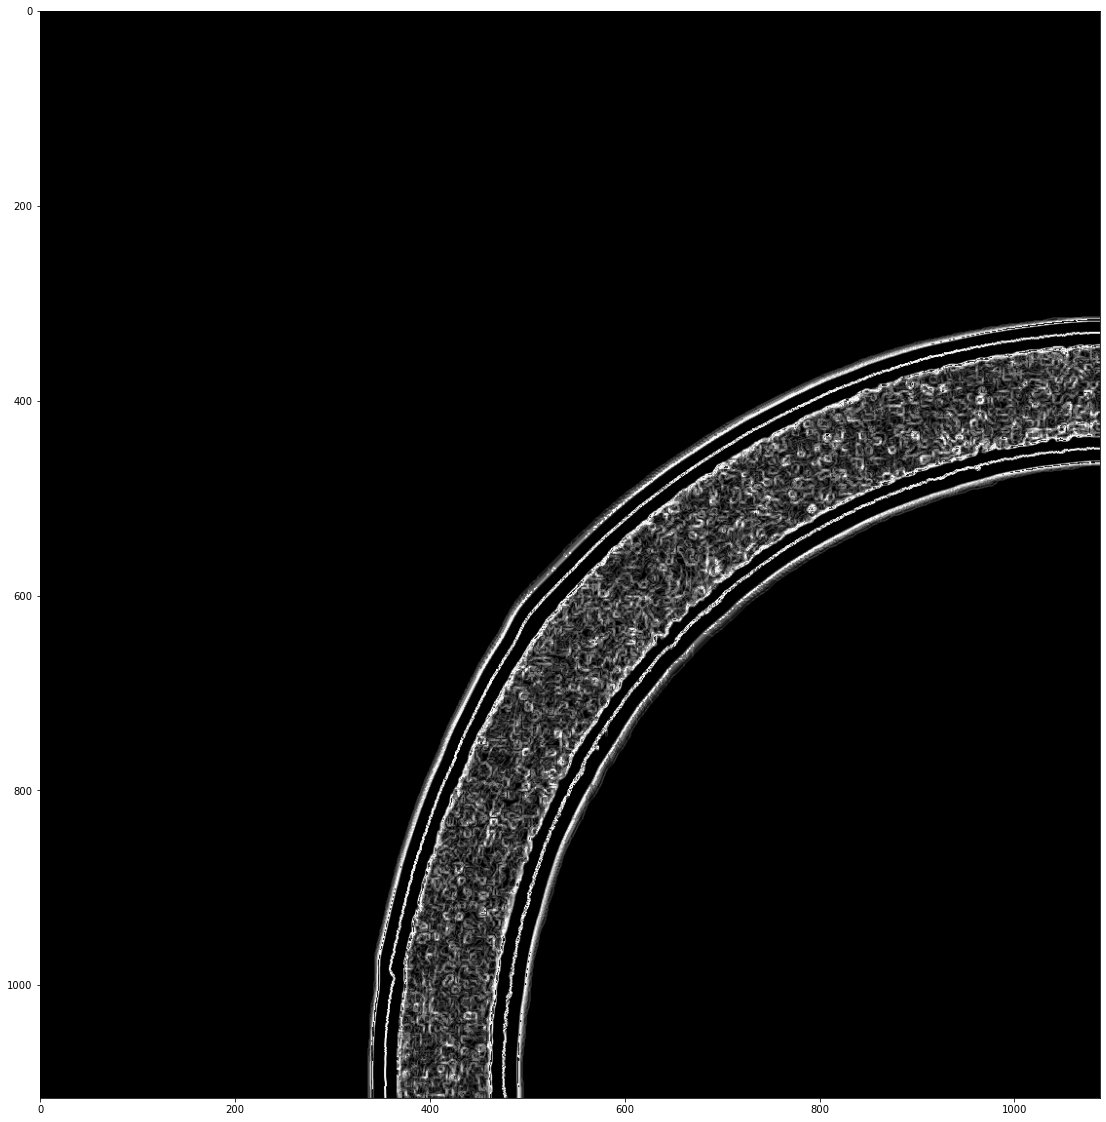

In [1271]:

sobelX = cv2.Sobel(sharpen_img, cv2.CV_64F, 1, 0)

sobelY = cv2.Sobel(sharpen_img, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))

sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)



plt.figure(figsize=(20,20))
plt.imshow(sobelCombined,cmap = 'gray')

### Mean and Std

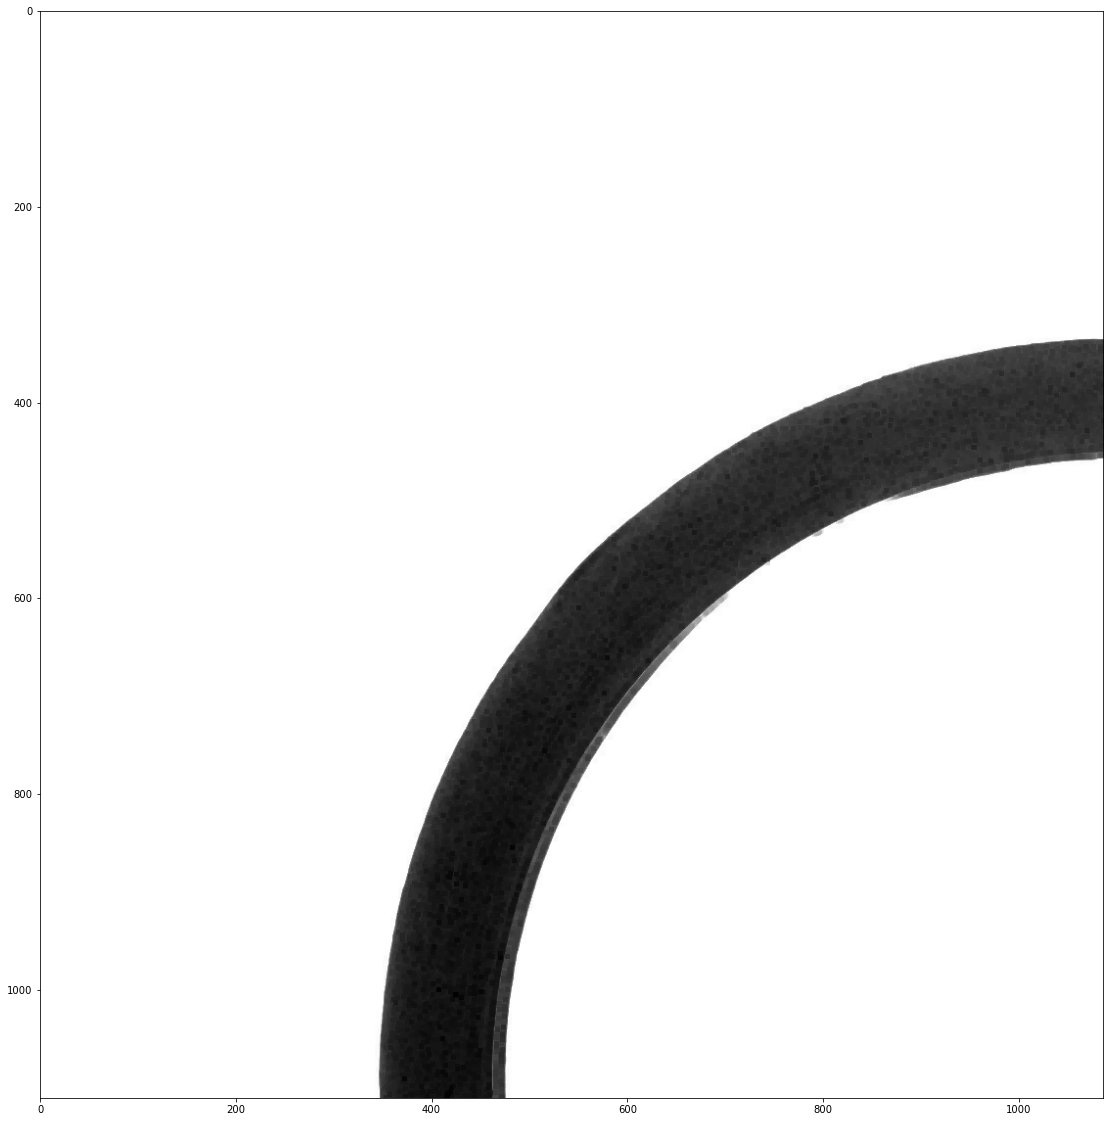

In [1244]:
from scipy import ndimage, misc
img_temp = img_list[8][:int(xc),:int(yc)]
img_temp.shape

#==========================================
#ascent = misc.ascent()

#result = cv2.GaussianBlur(img_temp,(3, 3), 0, 0);
#result = cv2.GaussianBlur(result,(3, 3), 0, 0);
img_temp = ndimage.minimum_filter(img_temp, size=5)
#result = cv2.Canny(result,60,60)
plt.figure(figsize=(20,20))
plt.imshow(img_temp,cmap = 'gray')

In [1245]:


block_size = (5,5)
block_img = []
block_std = []

print(img_temp.shape)
for w in range(block_size[0],img_temp.shape[0],block_size[0]):
    temp = []
    #temp_std = []
    for h in range(block_size[1],img_temp.shape[1],block_size[1]):
        #print(np.array(img_temp[w-block_size[0]:w,h-block_size[1]:h]).shape)
        temp.append(np.mean(img_temp[w-block_size[0]:w,h-block_size[1]:h]))
        #temp_std.append(np.std(img_temp[w-block_size[0]:w,h-block_size[1]:h]))
        
    #block_std.append(temp_std)
    block_img.append(temp)
    
#block_img = np.array(block_img)

#block_img.shape



(1111, 1087)


[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


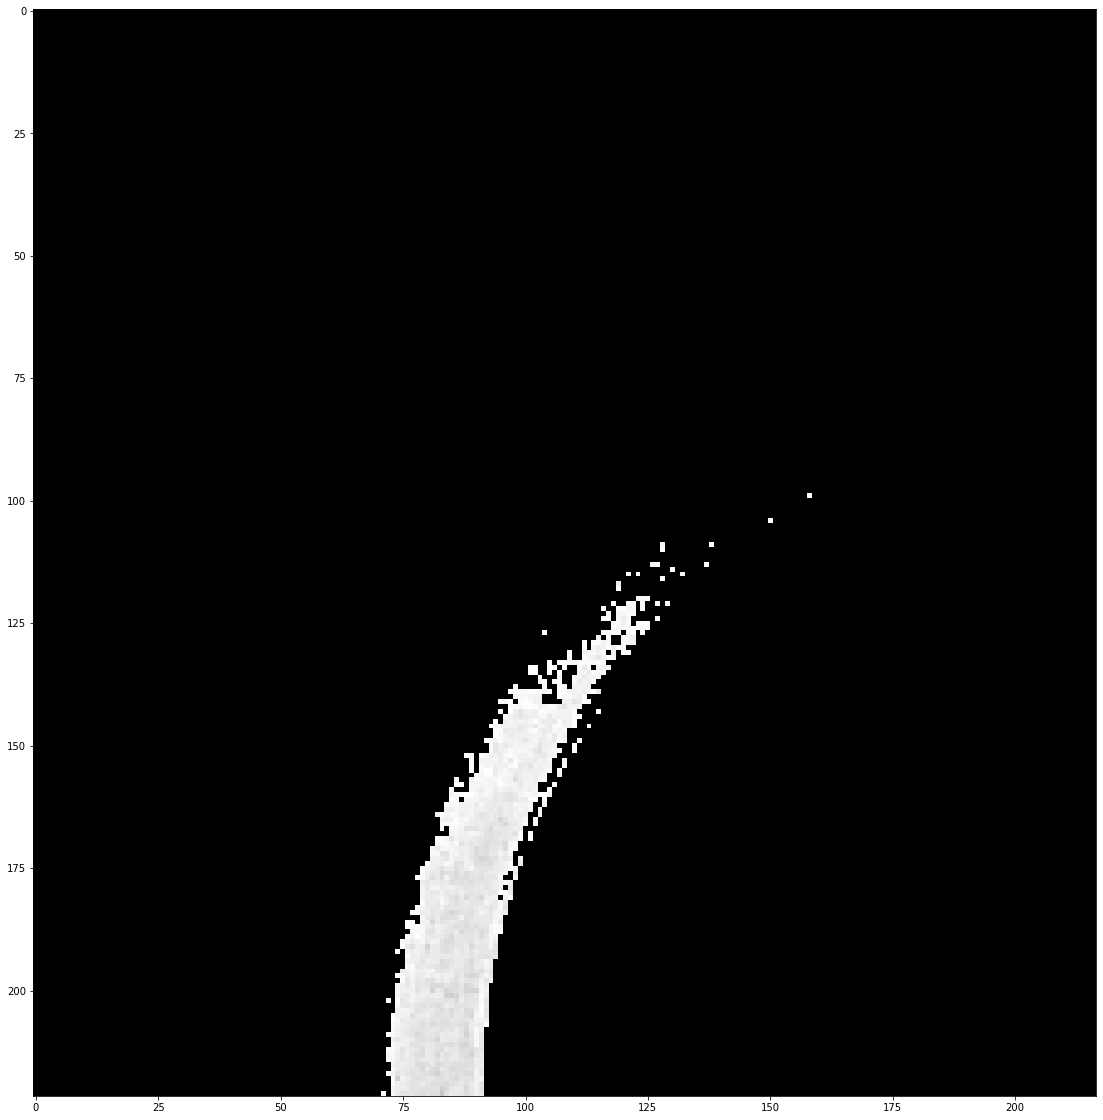

In [1246]:
block_img = np.array(block_img)
print(block_img)
ret,thresh1 = cv2.threshold(block_img,88,255,cv2.THRESH_TOZERO_INV)

plt.figure(figsize=(20,20))
plt.imshow(thresh1,cmap = 'gray')

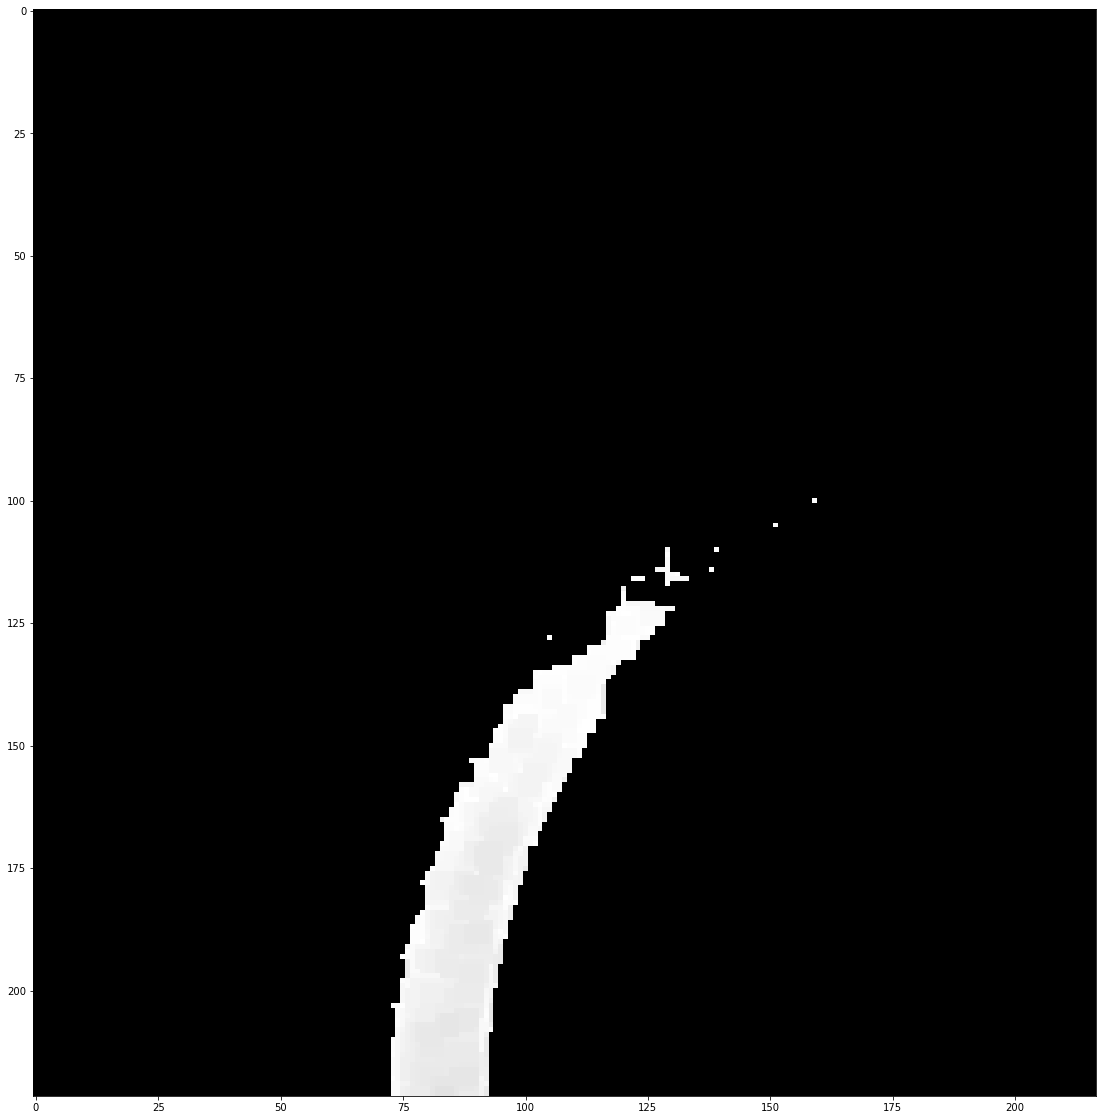

In [1247]:
kernel = np.ones((4,4),np.uint8)

#opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(20,20))
plt.imshow(closing,cmap = 'gray')


#contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#backtorgb = cv2.cvtColor(closing,cv2.COLOR_GRAY2RGB)
#for i in range(contours.shape):
#    cv2.drawContours(backtorgb,contours[i],-1,(0,0,255),3)

#plt.figure(figsize=(20,20))
#plt.imshow(backtorgb,cmap = 'gray')
